## PRCP-1004-Fifa20
## ProjectID:- PTID-CDS-NOV-24-2192

#### First we have to import all neccessary libraries,

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("players_20.csv")

In [3]:
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


# Basic checks

#### Here, we can check the basic checks

In [4]:
data.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [5]:
data.tail(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [16]:
data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [17]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


# EDA

## Why EDA (Exploratory Data Analysis) is Important 
#### Exploratory Data Analysis (EDA) is one of the most important steps and the first step in a data science workflow. The process of EDA involves checking and visualizing the data so that its structure can be understood, patterns discovered, anomalies identified, and all this information can be obtained.

#### EDA helps you better understand your data: It uncovers hidden insights, identifies patterns, anomalies, and structures that can guide further analysis.
#### Prepares the data to be modeled: Through cleaning and transforming the data according to what you now know from EDA, you prepare your dataset in a manner that best enhances the model's performance.
#### Ensures quality and accuracy in modeling: Proper handling of missing data, outliers, and noise along with visualization of relationships between variables gives EDA a strong foundation for building accurate and reliable machine learning models.

In [10]:
!pip install --upgrade ydata-profiling

In [11]:
profile = ProfileReport(data, explorative=True)
profile.to_file("data_profile_report.html")
print("\nData profiling report saved as 'data_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


Data profiling report saved as 'data_profile_report.html


In [4]:
data = data.fillna(value=0)  # Replace NaN with 0
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,0,0,0,0,0,0,0,0,0,0
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [5]:
data.isnull().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 104, dtype: int64

In [6]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
categorical_columns


Index(['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
       'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [7]:
data = data.drop(columns=categorical_columns)
data

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,32,170,72,94,94,95500000,565000,5,4,...,75,96,33,37,26,6,11,15,14,8
1,20801,34,187,83,93,93,58500000,405000,5,4,...,85,95,28,32,24,7,11,15,14,11
2,190871,27,175,68,92,92,105500000,290000,5,5,...,90,94,27,26,29,9,9,15,15,11
3,200389,26,188,87,91,93,77500000,125000,3,3,...,11,68,27,12,18,87,92,78,90,89
4,183277,28,175,74,91,91,90000000,470000,4,4,...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,22,186,79,48,56,40000,2000,1,3,...,39,41,45,50,52,5,5,13,5,14
18274,250995,22,177,66,48,56,40000,2000,1,2,...,37,35,42,53,57,13,6,14,11,9
18275,252332,19,186,75,48,56,40000,1000,1,2,...,36,39,46,52,46,7,8,10,6,14
18276,251110,18,185,74,48,54,40000,1000,1,2,...,36,40,39,44,54,14,9,13,13,13


### Why We Clean Boxplot Outliers:
#### Improves model performance: Outliers can distort model predictions, cause overfitting, and slow down the convergence of algorithms.
Provides clearer insights: Cleaning outliers makes visualizations more meaningful, representing the majority of data more accurately.
Ensures better statistical analysis: Outliers can violate assumptions for statistical tests, leading to inaccurate conclusions.
Normalizes data distributions: Outliers can make the data highly skewed, making it less representative of typical cases. Cleaning them helps achieve a normal distribution, which is preferred by many models.
Corrects data entry errors: Sometimes, outliers are simply mistakes, and removing them ensures the dataset is clean and accurate.
#### When Should You Not Remove Outliers?
While cleaning outliers is often beneficial, there are cases where outliers should not be removed:

Important rare events: If the outliers represent important rare events (e.g., fraud detection, medical diagnoses), removing them might cause you to lose valuable insights.
Robust models: Some models (like decision trees, random forests, and gradient boosting machines) are more robust to outliers and can handle them well without degradation in performance.
#### IQR Formula for Outliers:
First Quartile (Q1): The 25th percentile of the data (i.e., the median of the lower half of the data).

Third Quartile (Q3): The 75th percentile of the data (i.e., the median of the upper half of the data).

IQR (Interquartile Range): The difference between the third and first quartiles:

IQR=Q3−Q1
Outlier Thresholds: The typical rule for identifying outliers is:

Lower Bound = Q1−1.5×IQR
Upper Bound = Q3+1.5×IQR
Any data points that fall below the lower bound or above the upper bound are considered outliers.

Outliers are any data points that fall outside the range [Q1−1.5×IQR,Q3+1.5×IQR].

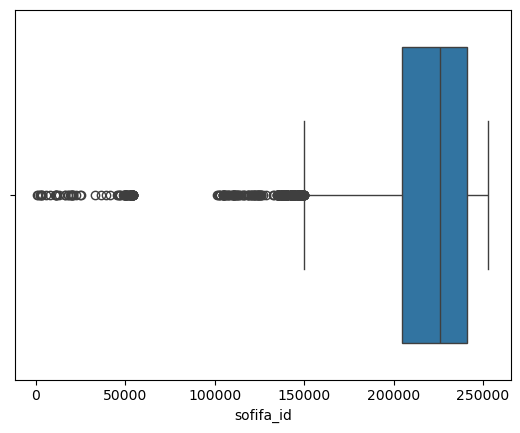

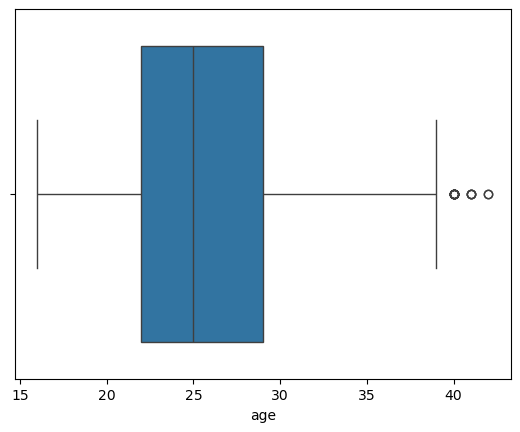

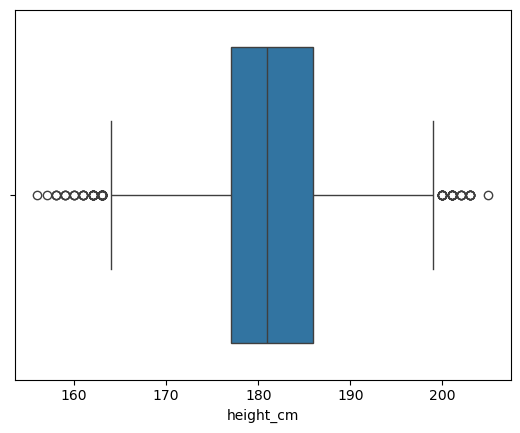

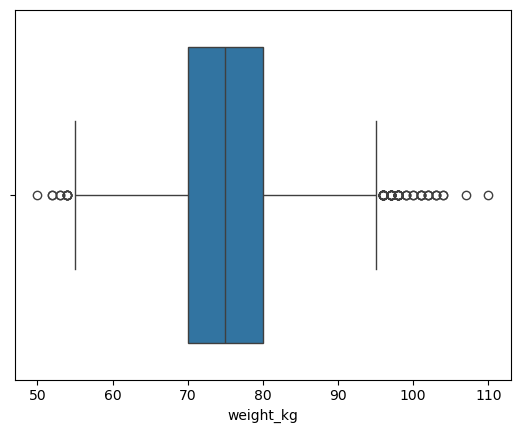

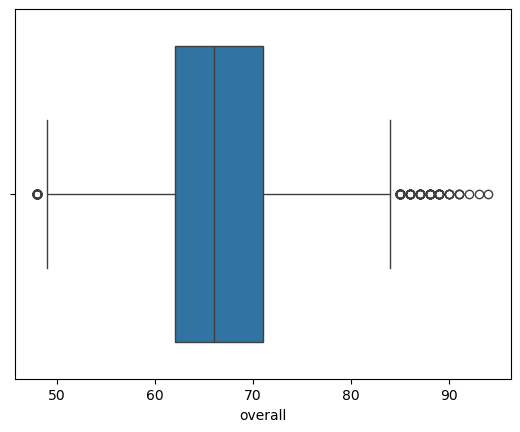

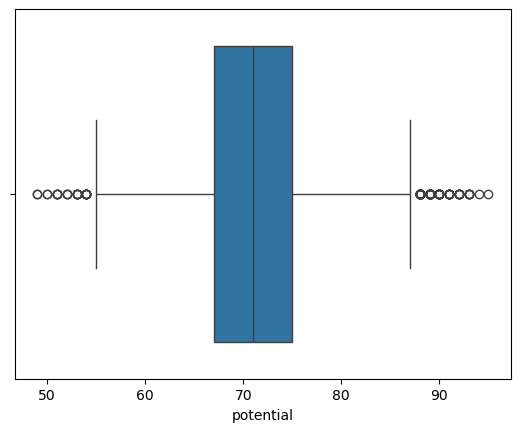

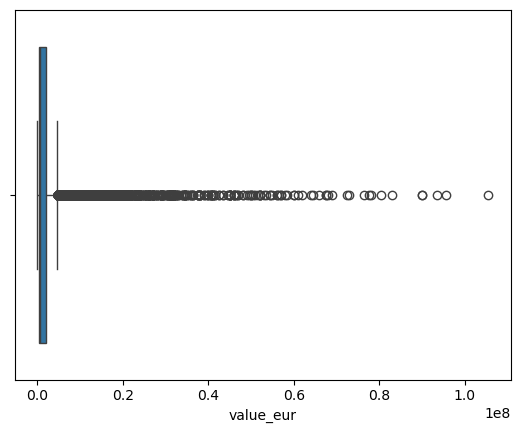

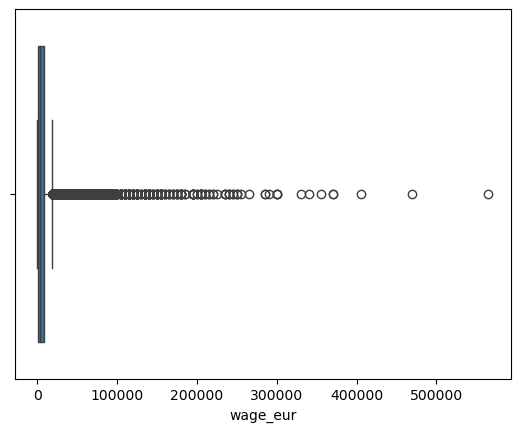

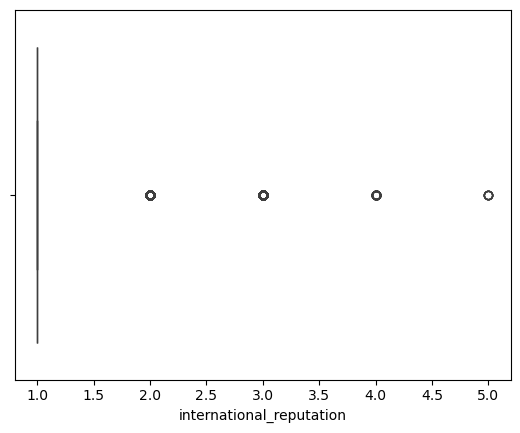

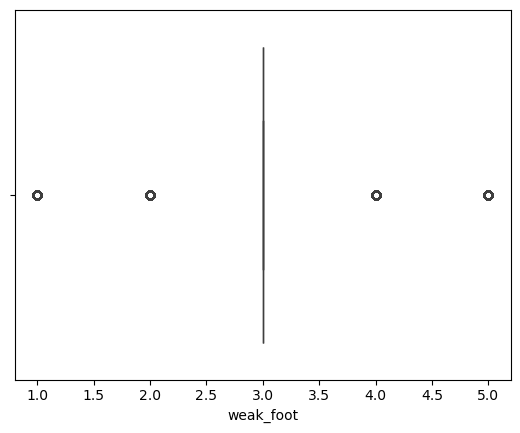

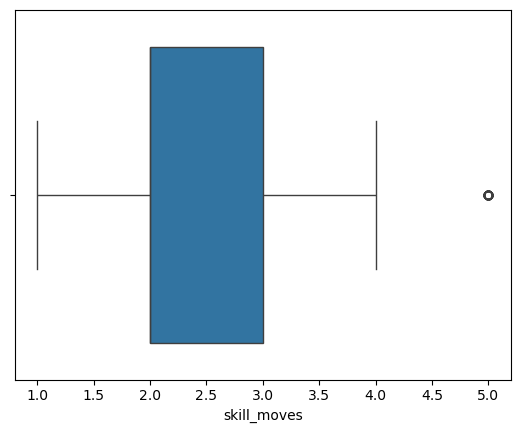

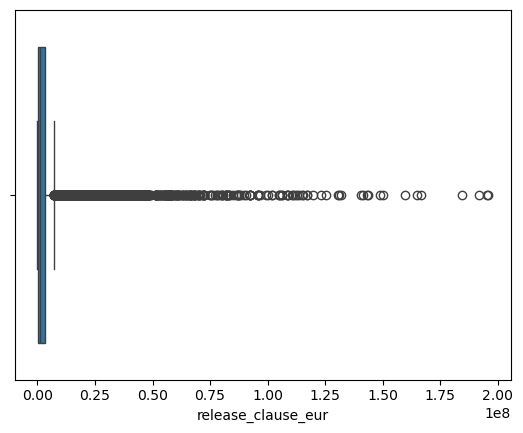

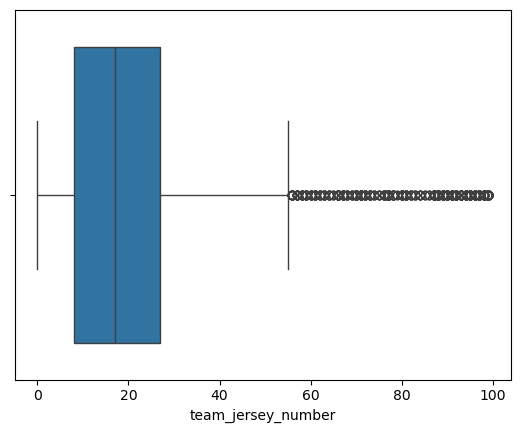

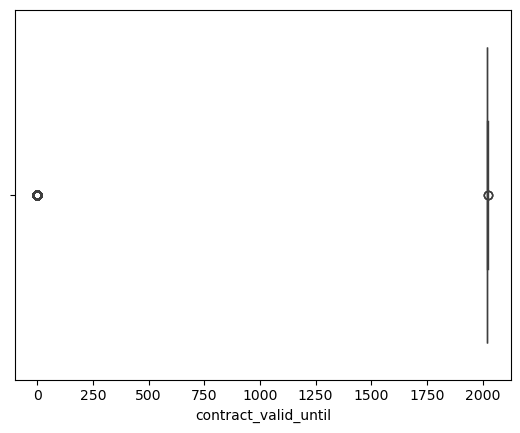

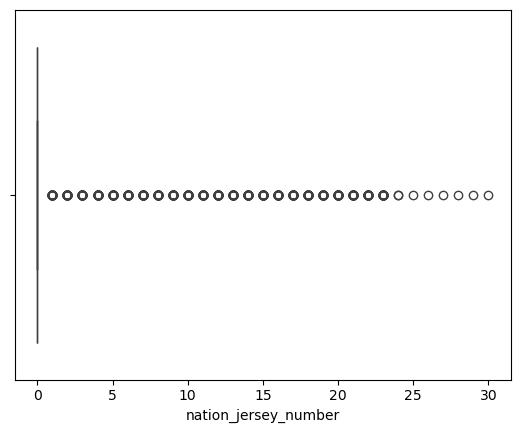

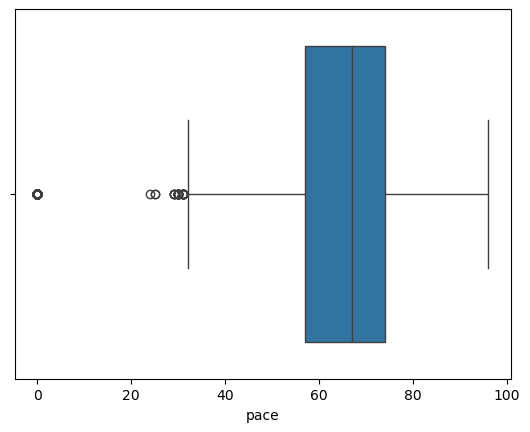

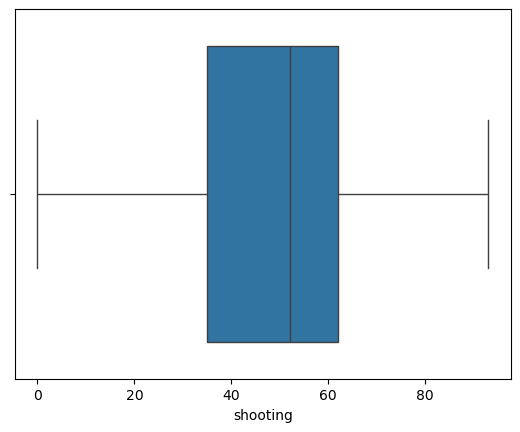

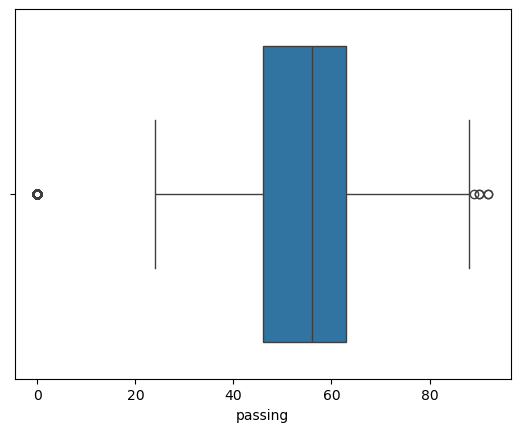

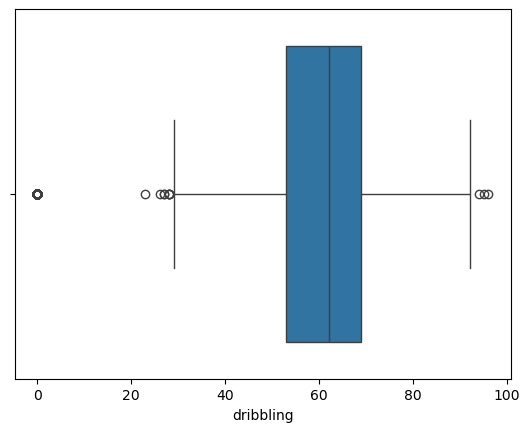

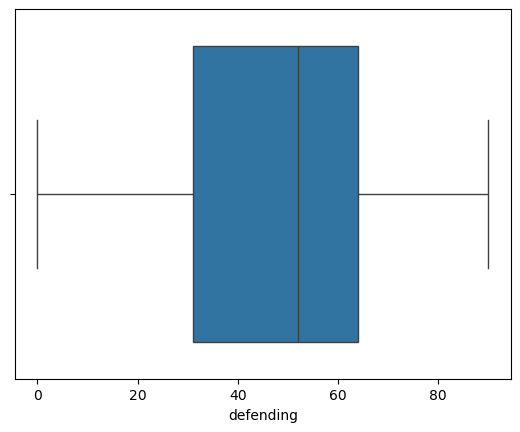

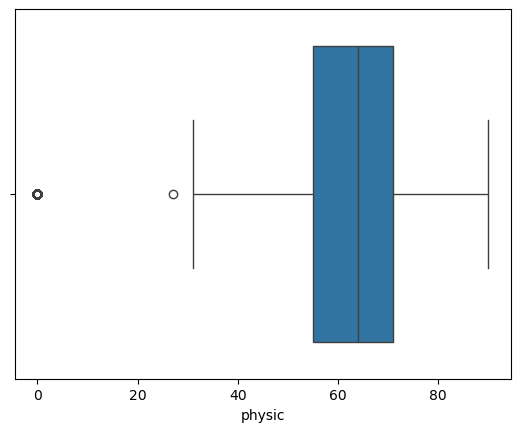

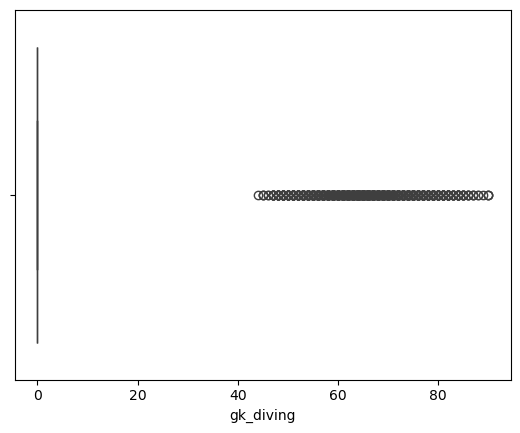

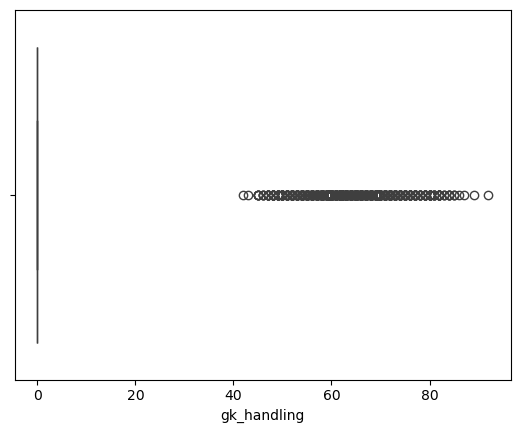

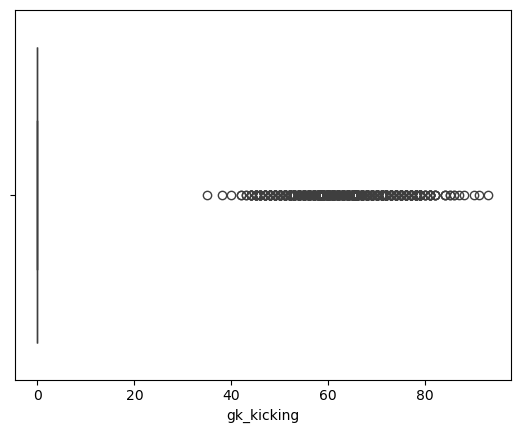

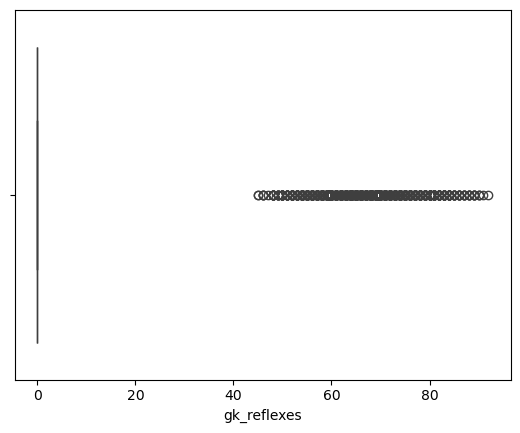

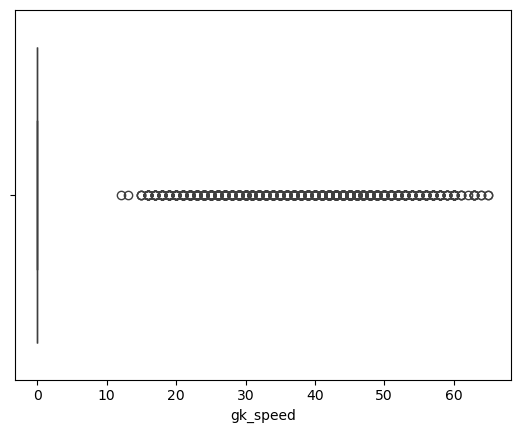

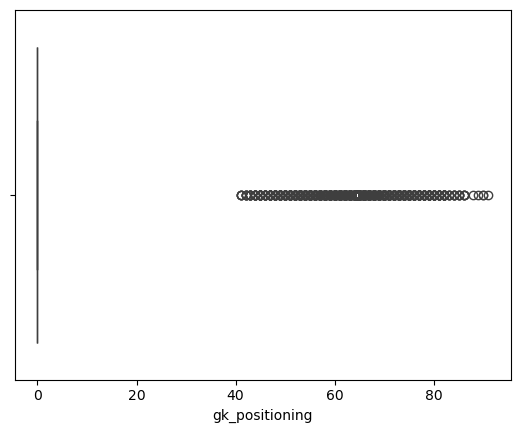

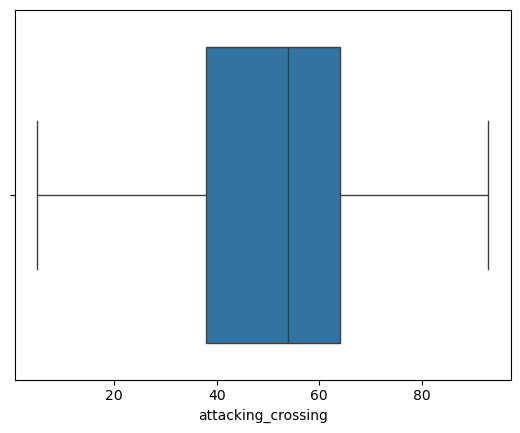

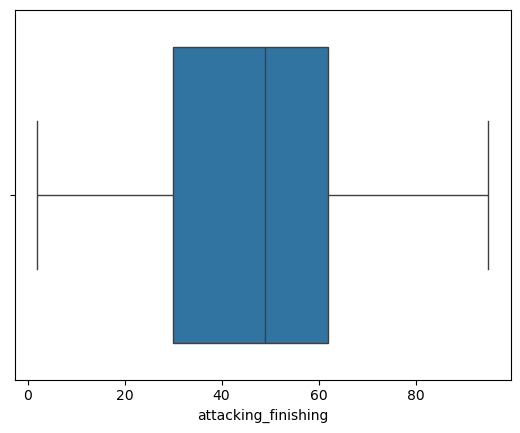

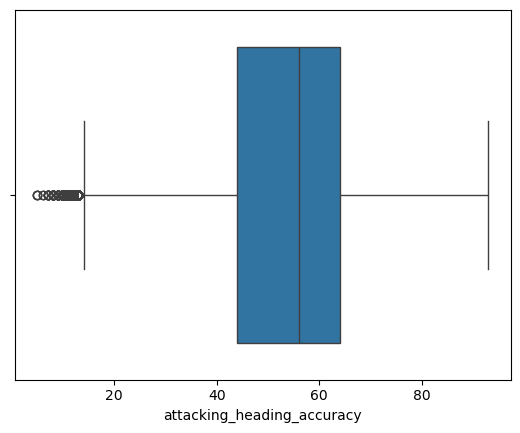

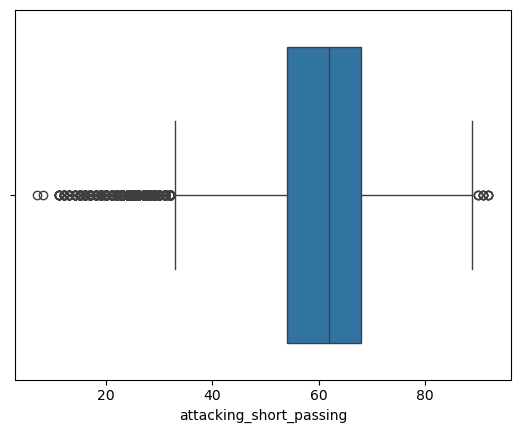

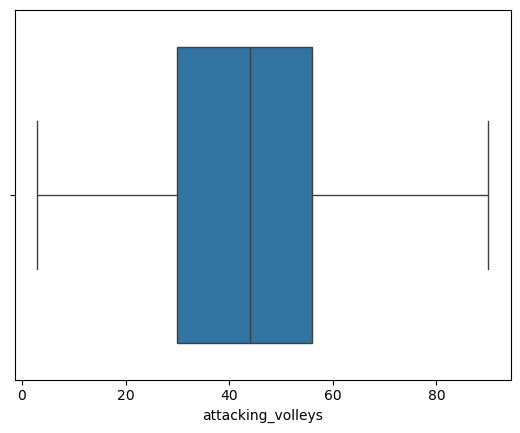

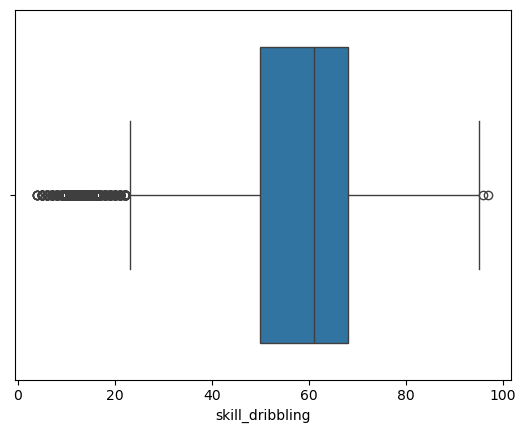

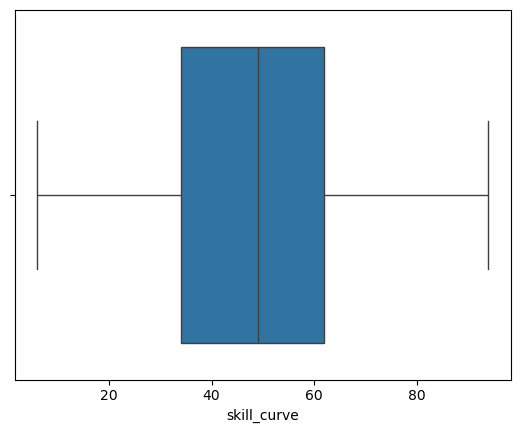

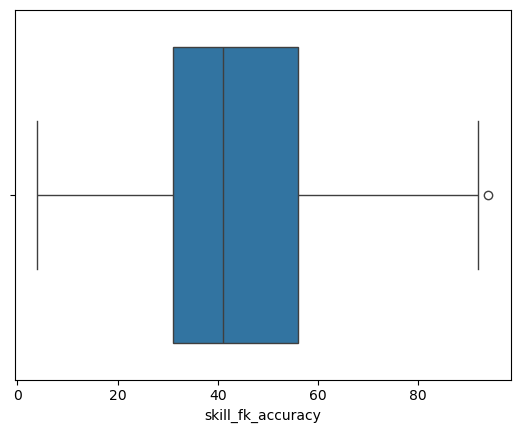

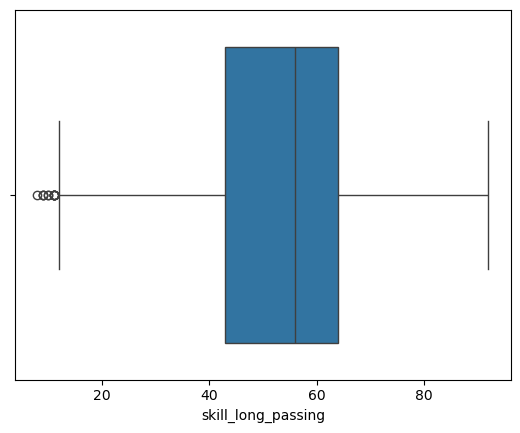

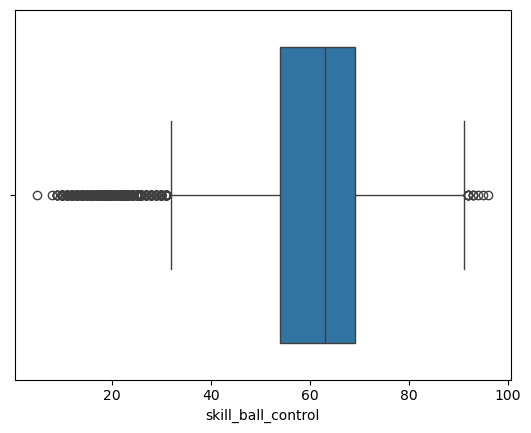

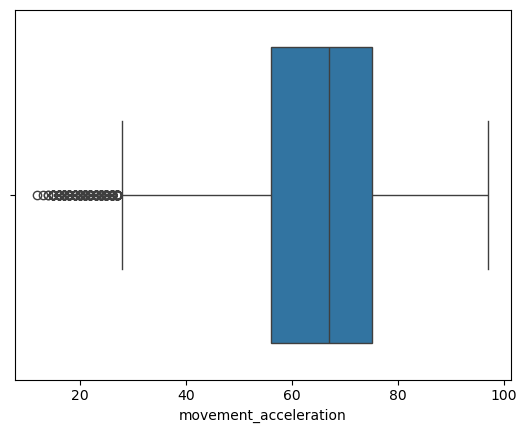

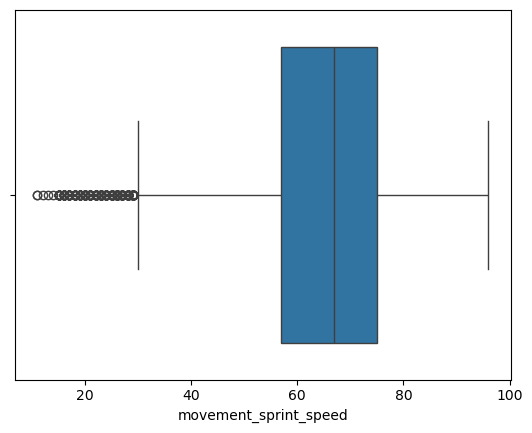

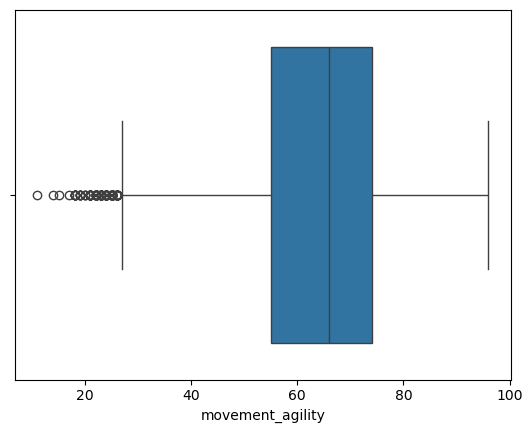

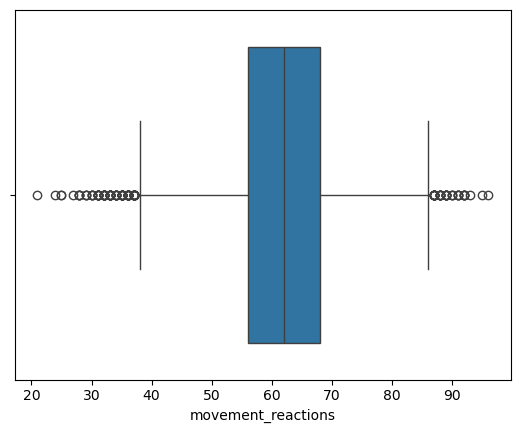

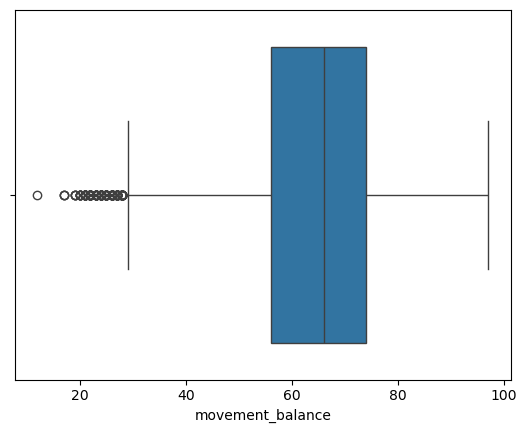

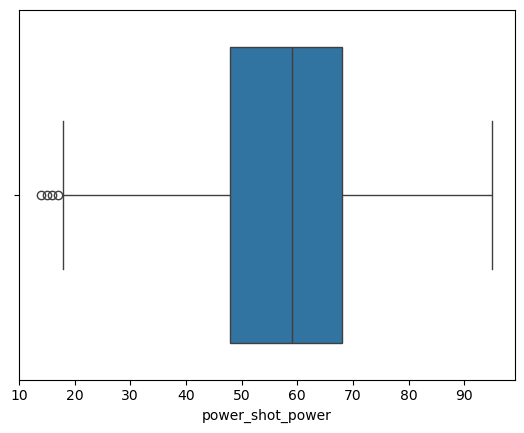

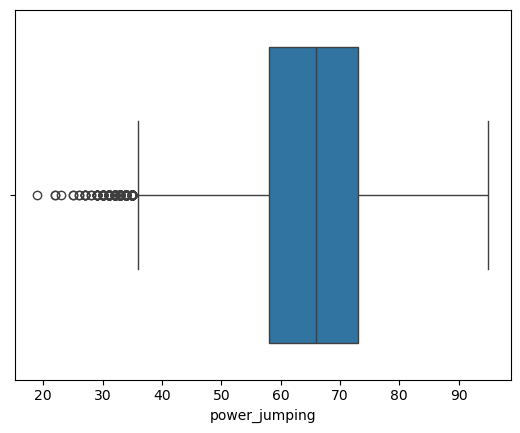

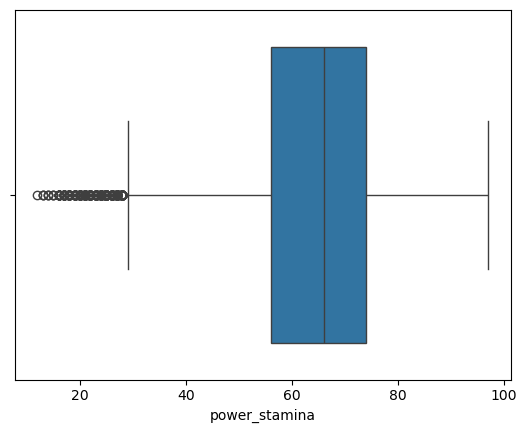

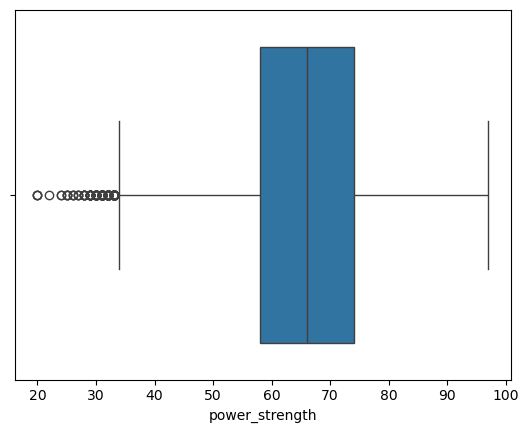

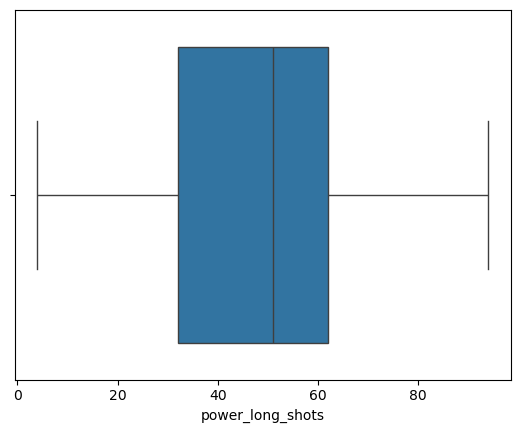

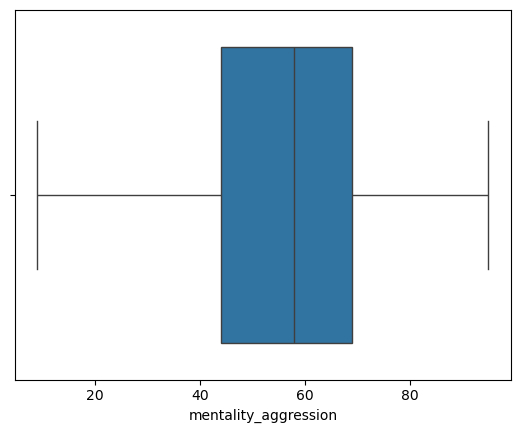

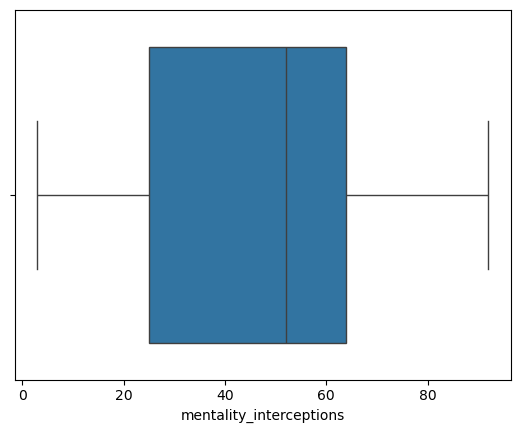

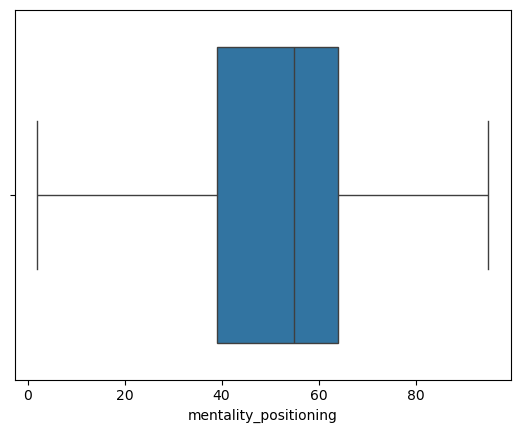

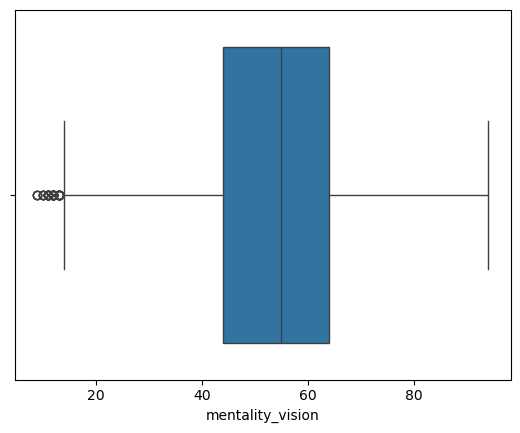

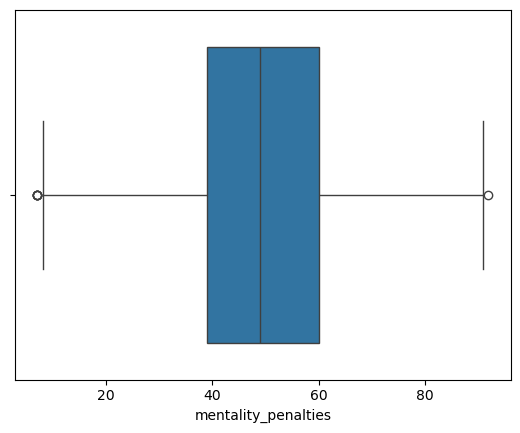

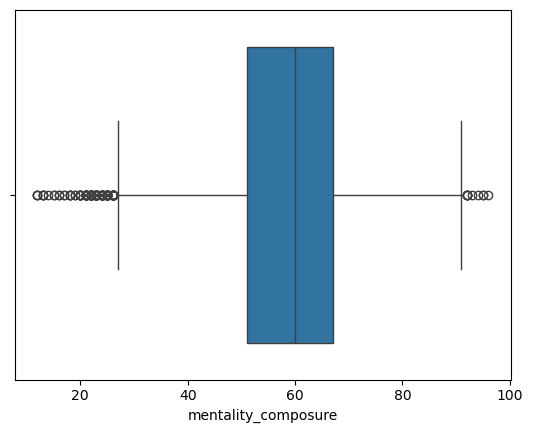

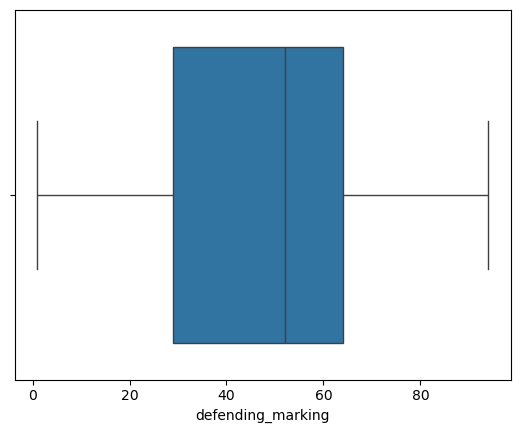

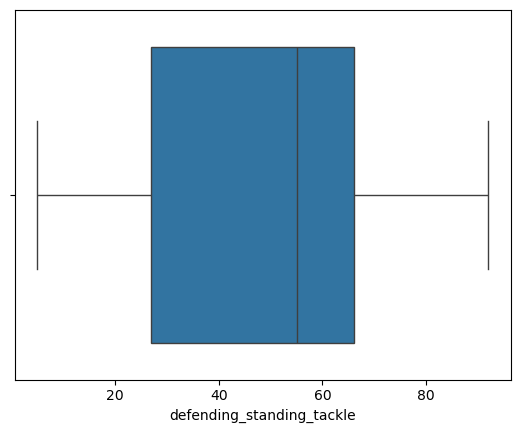

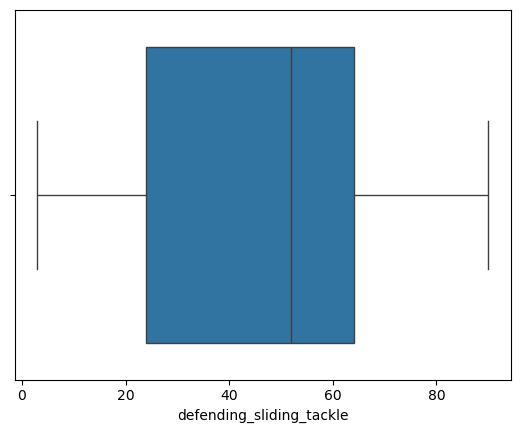

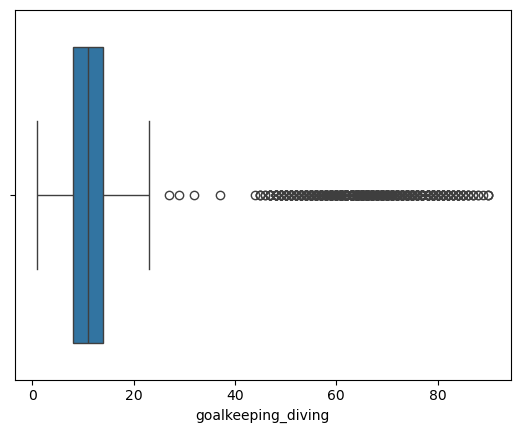

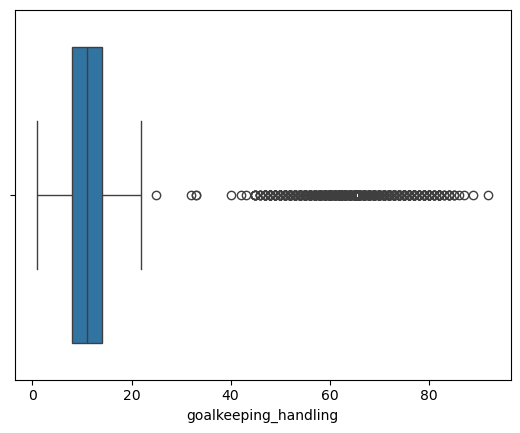

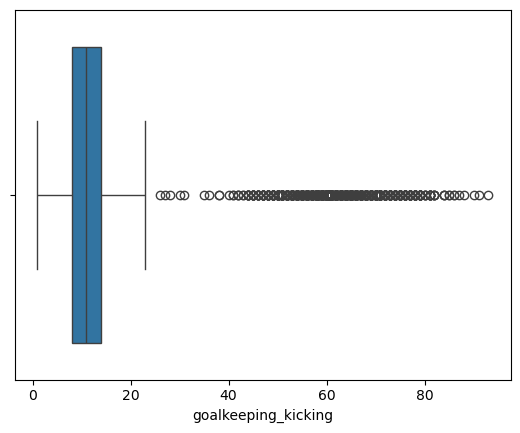

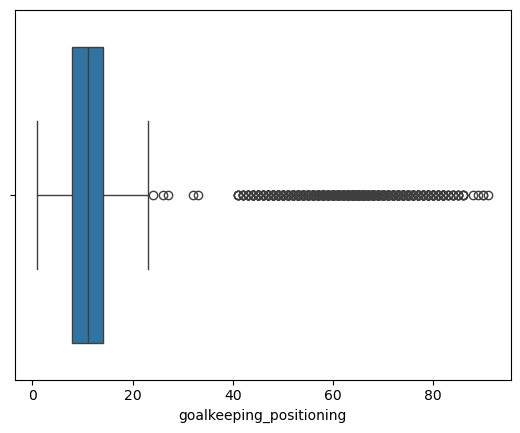

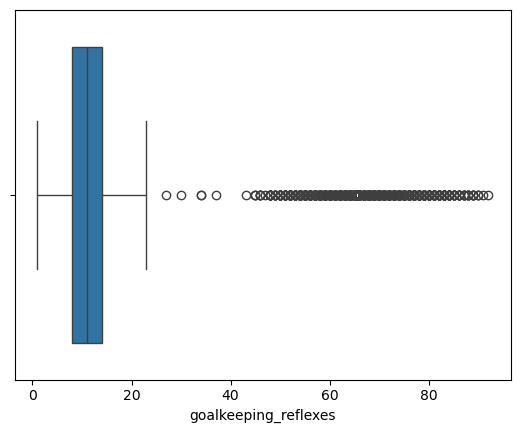

In [8]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for multiple columns
for column in numerical_columns:
    sns.boxplot(data=data, x=column)
    plt.show()


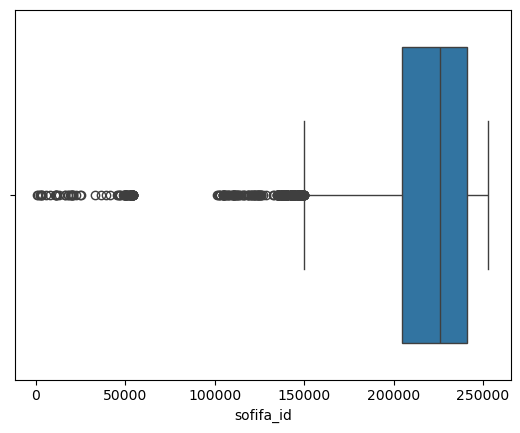

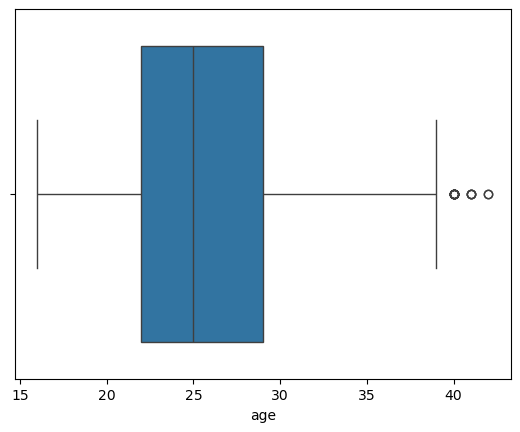

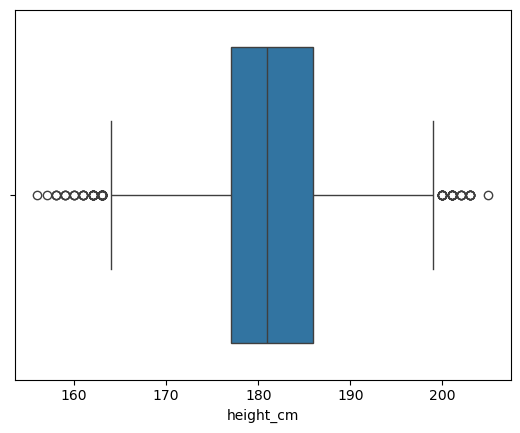

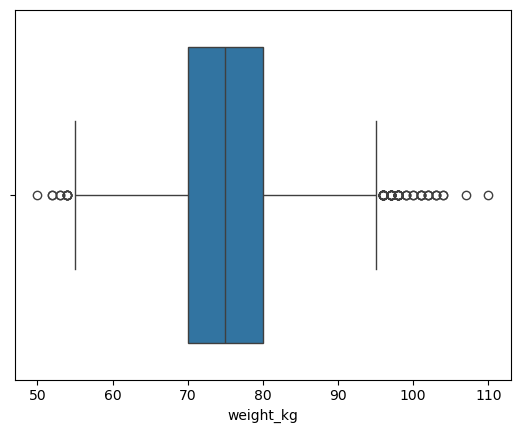

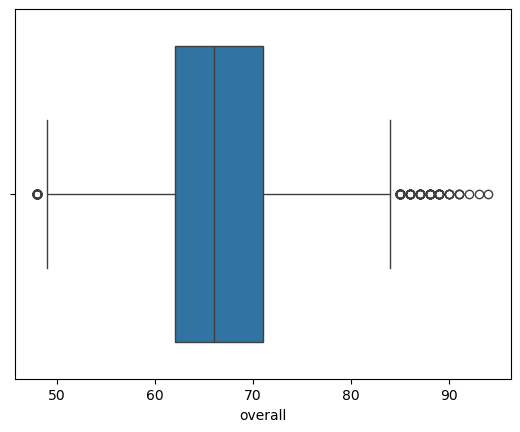

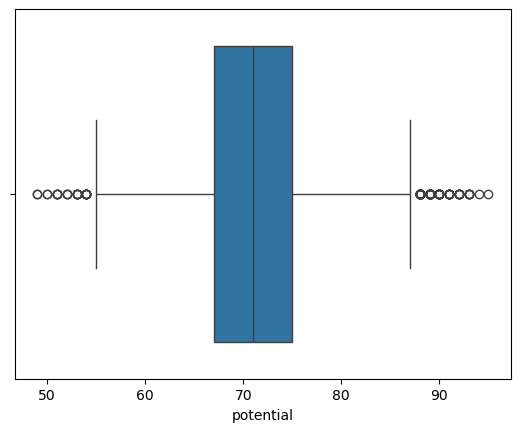

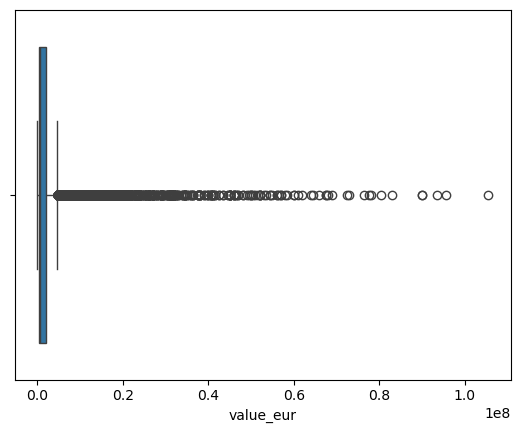

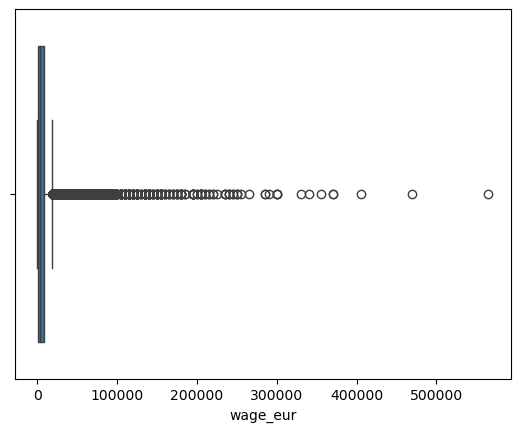

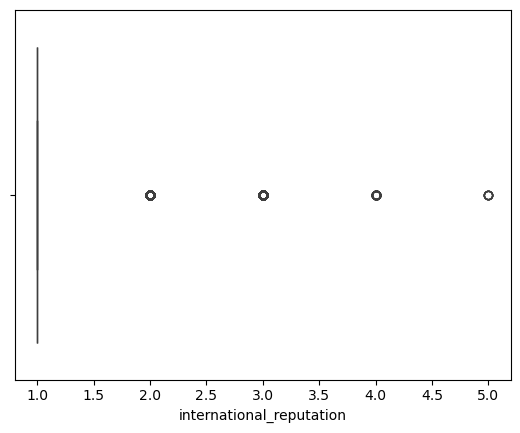

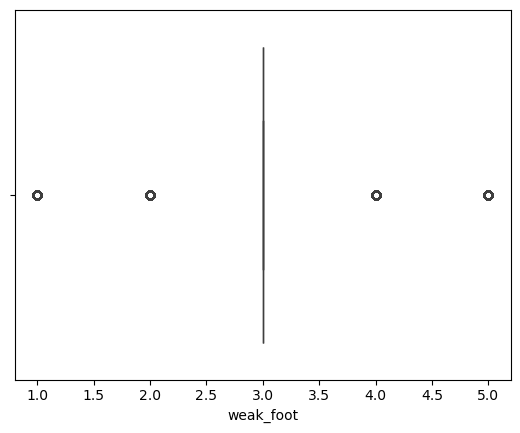

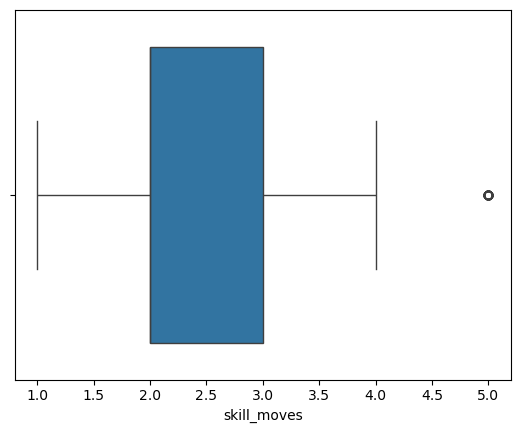

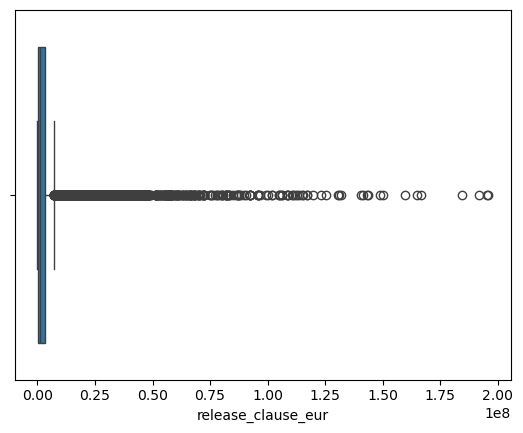

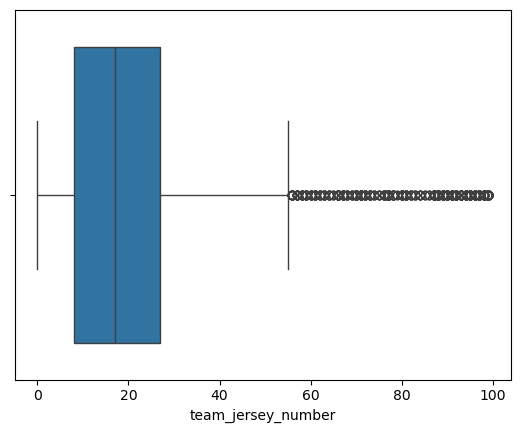

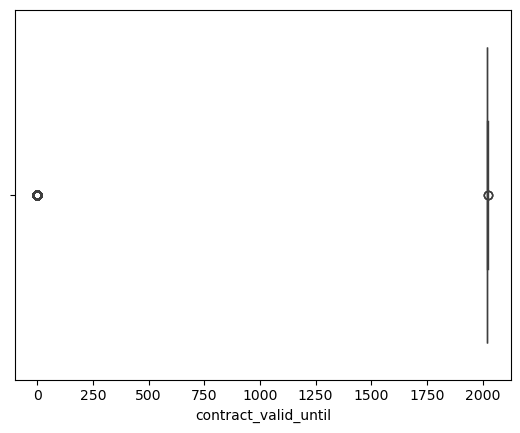

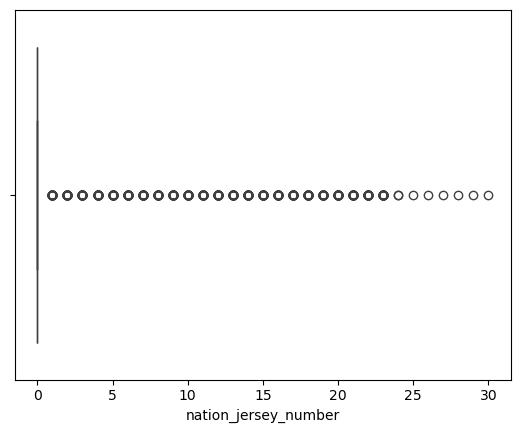

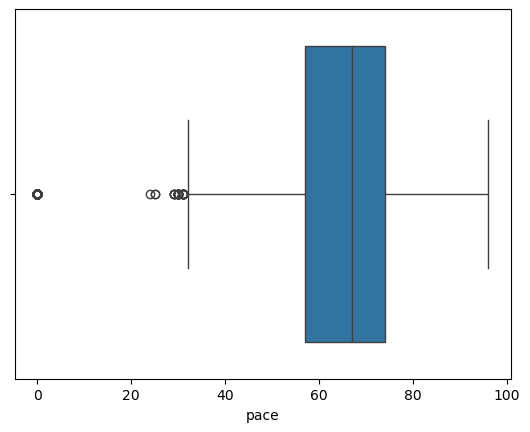

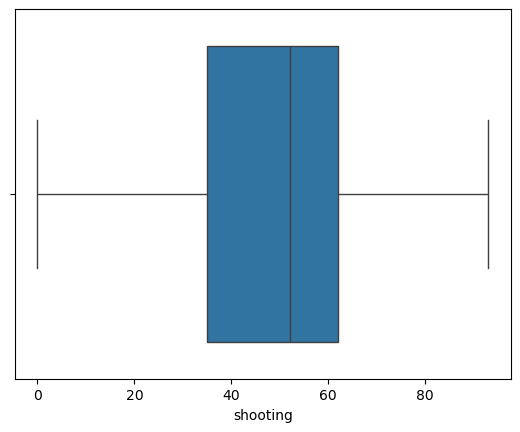

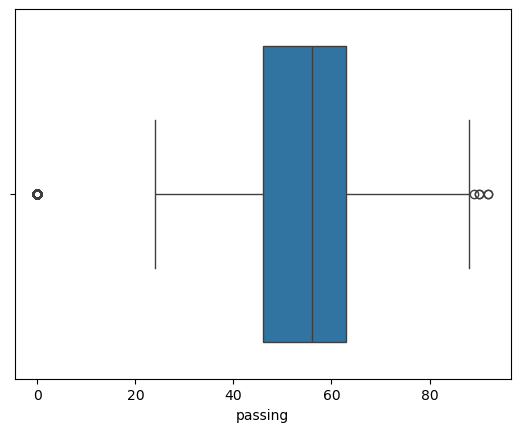

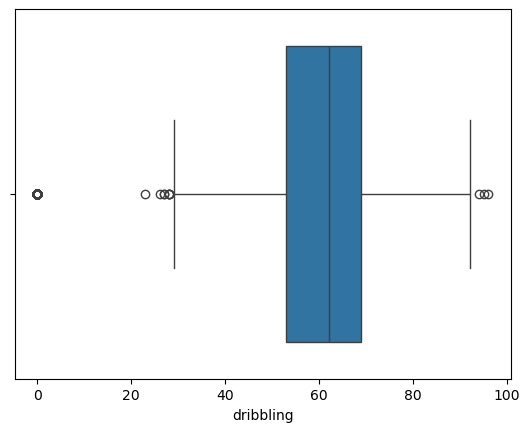

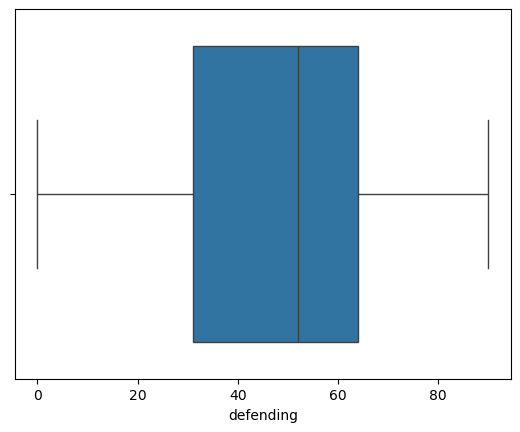

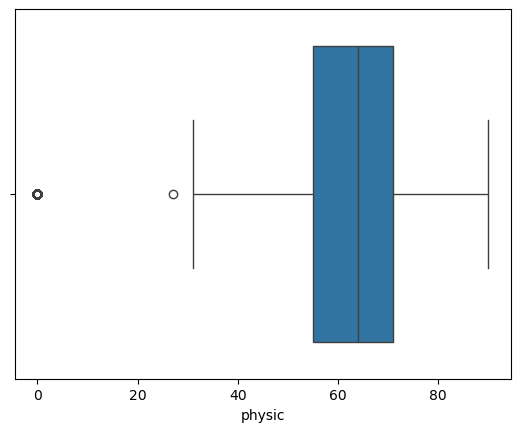

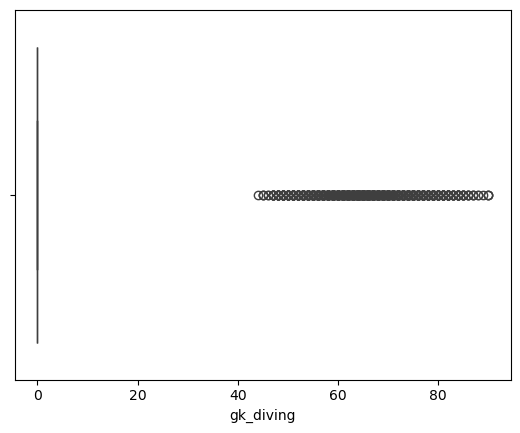

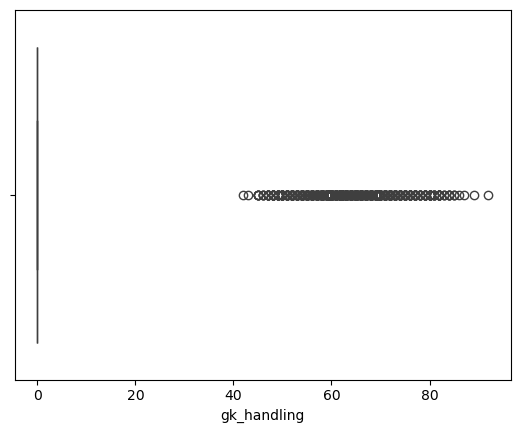

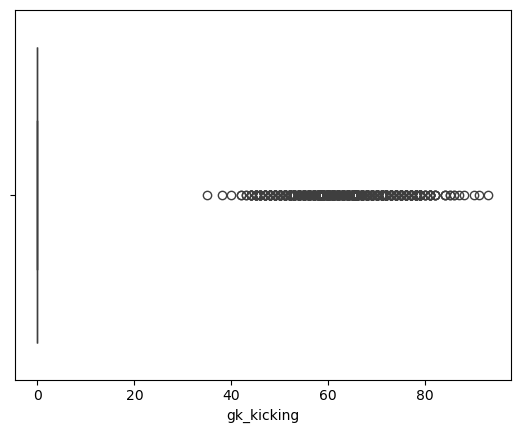

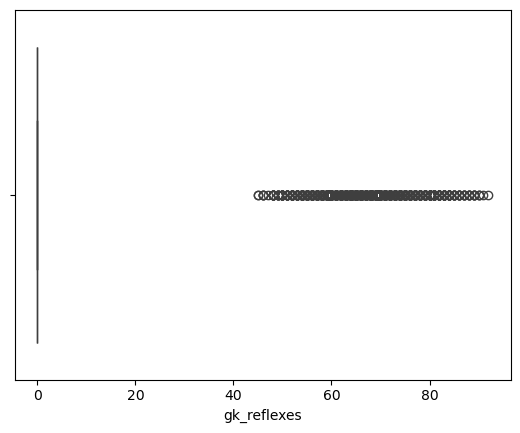

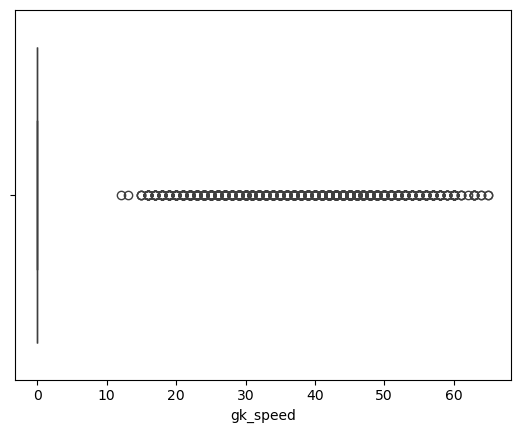

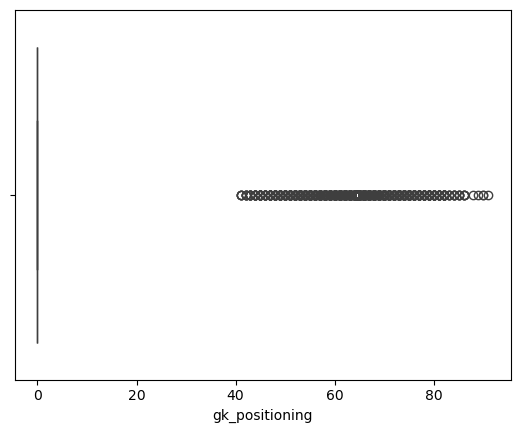

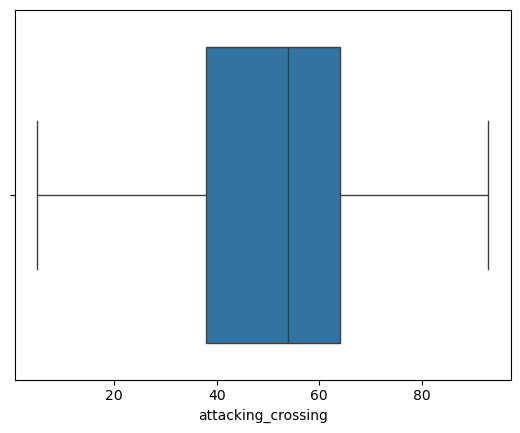

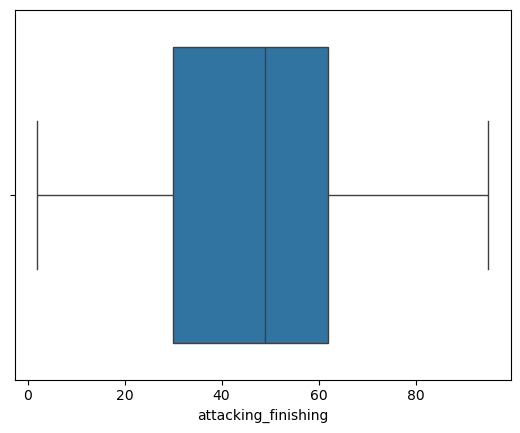

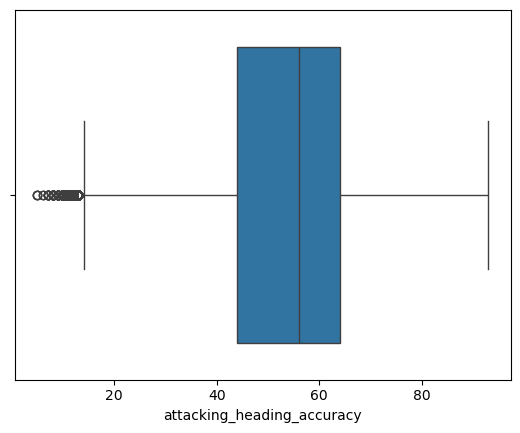

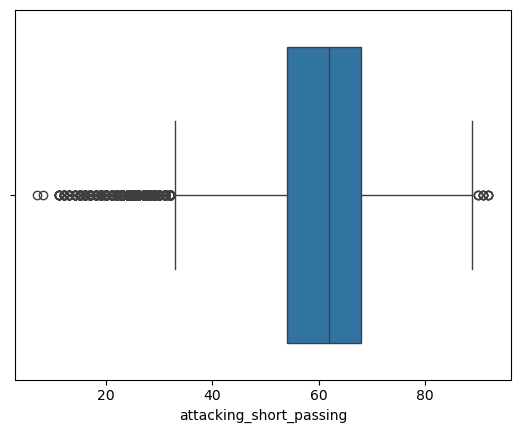

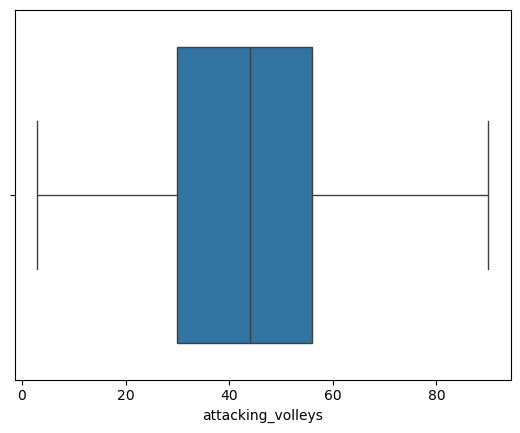

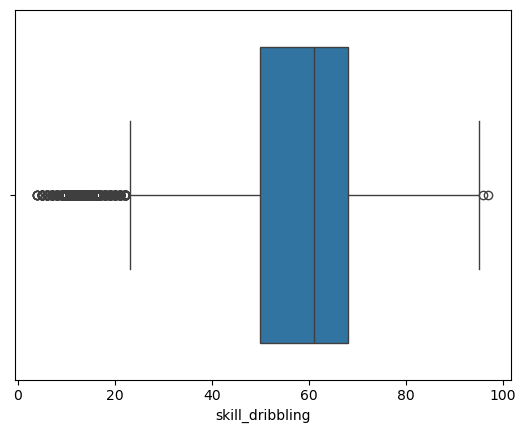

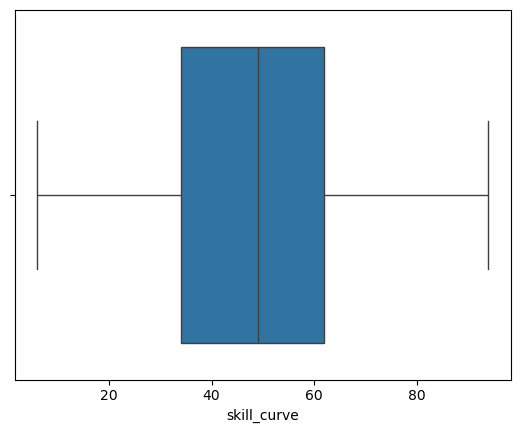

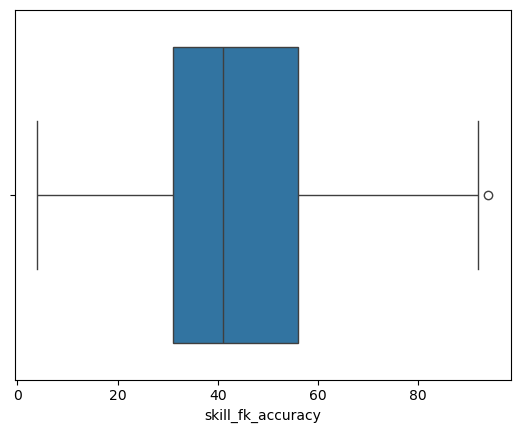

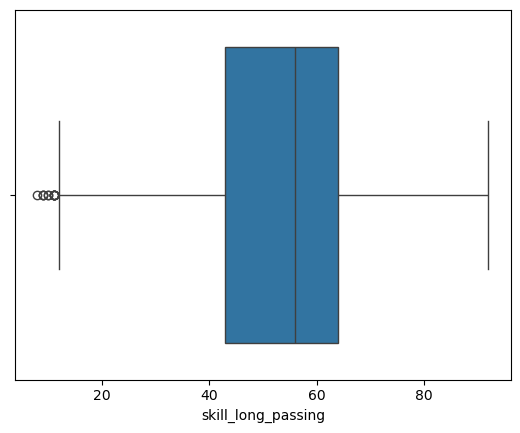

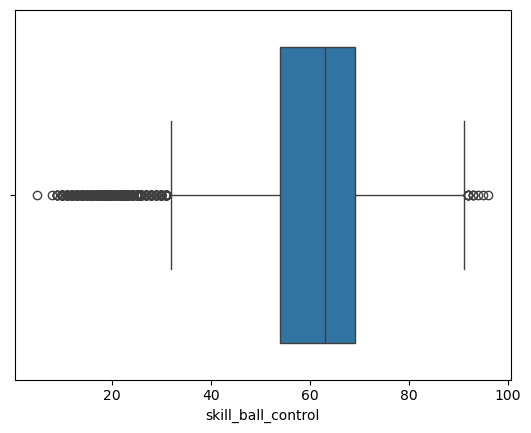

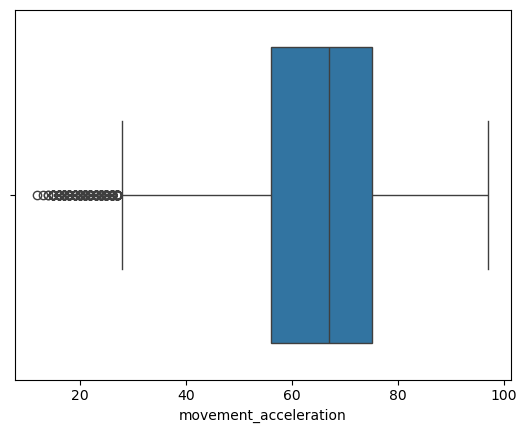

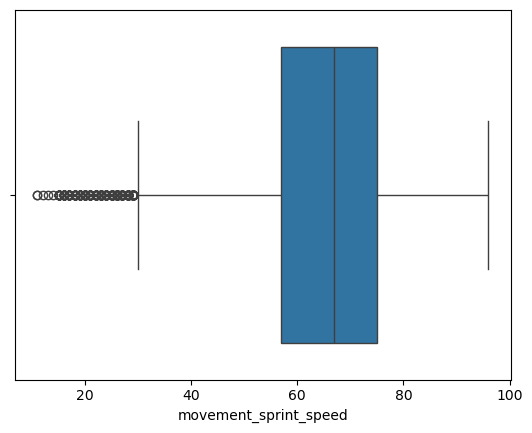

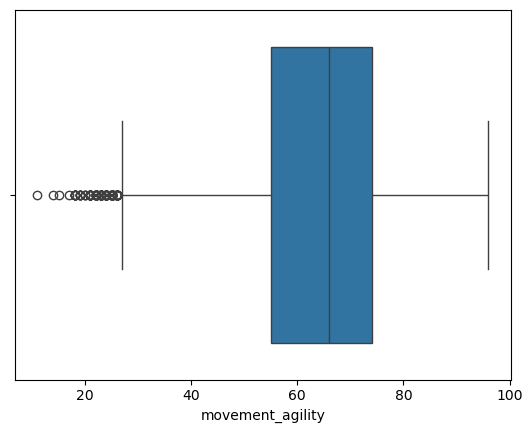

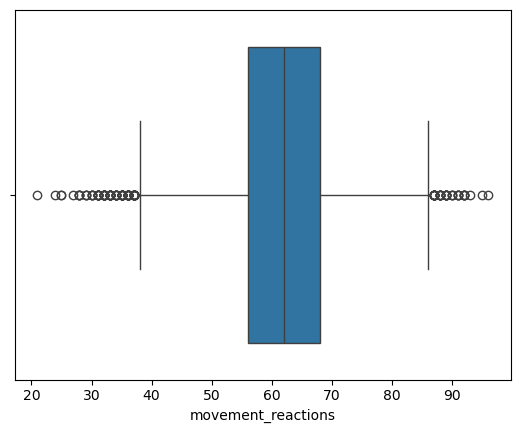

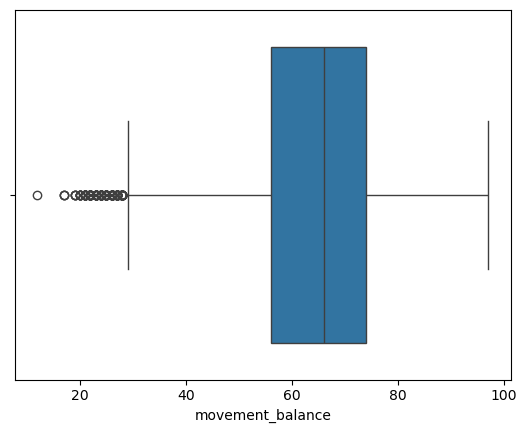

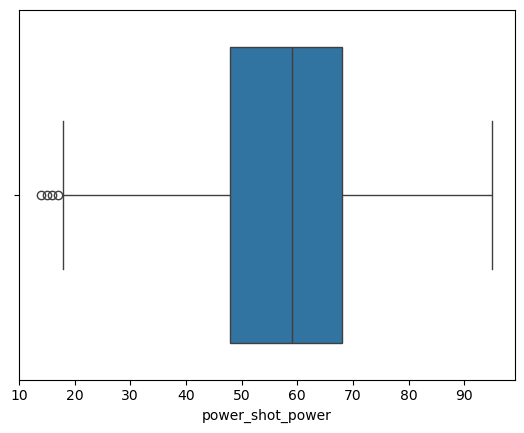

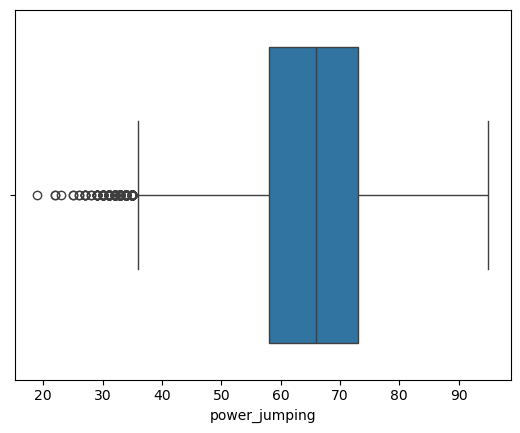

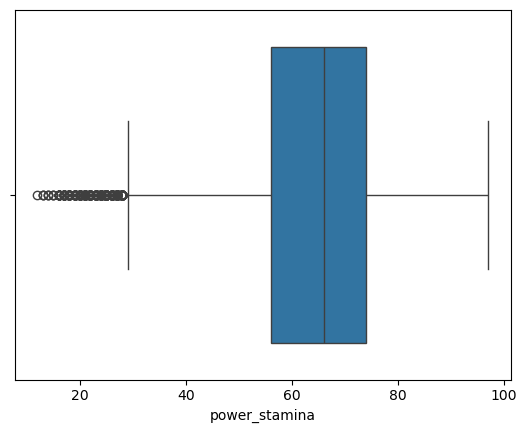

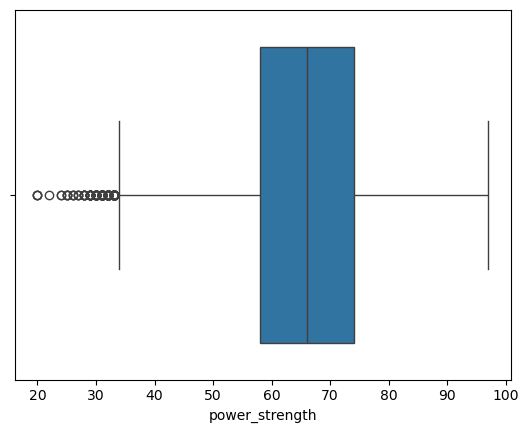

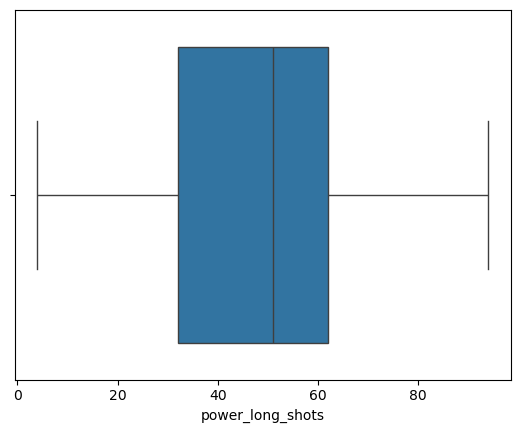

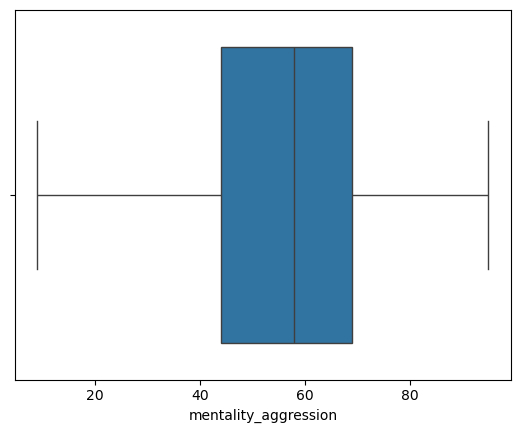

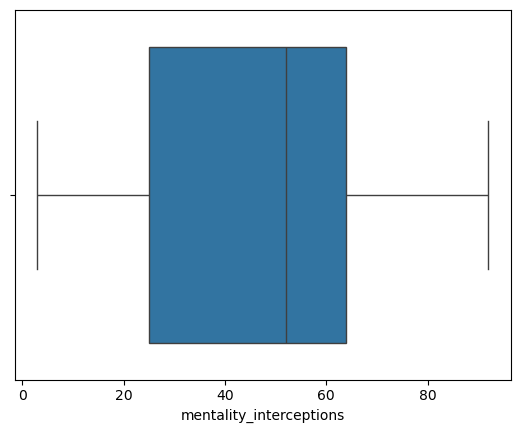

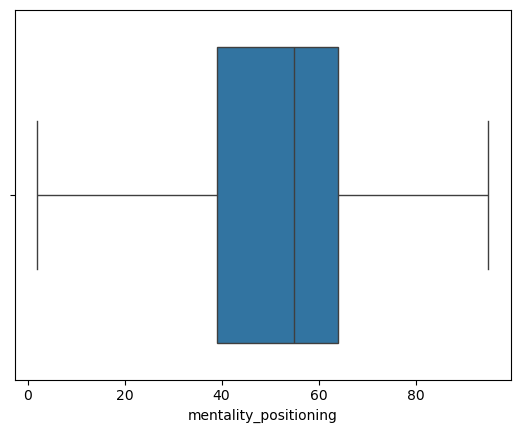

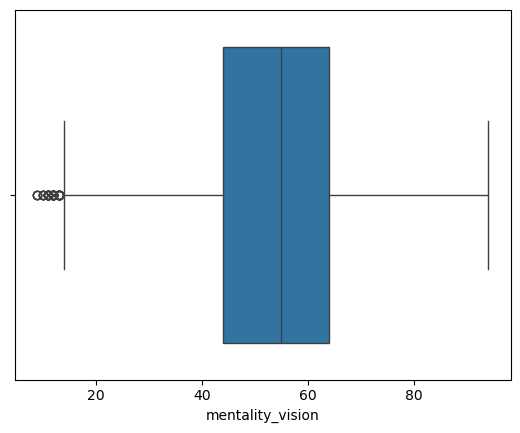

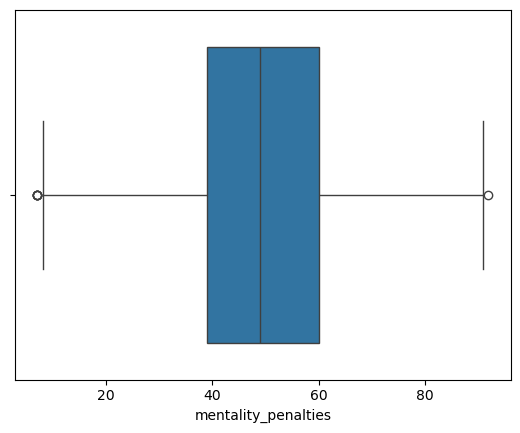

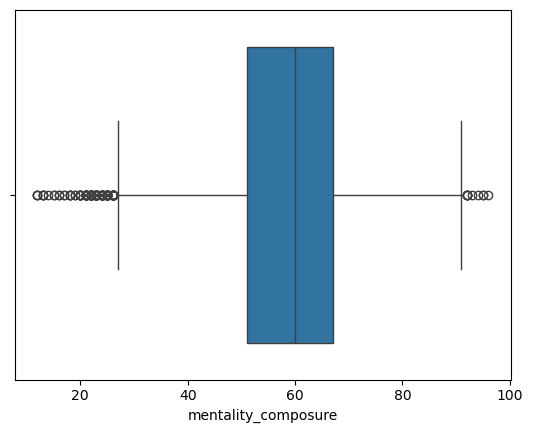

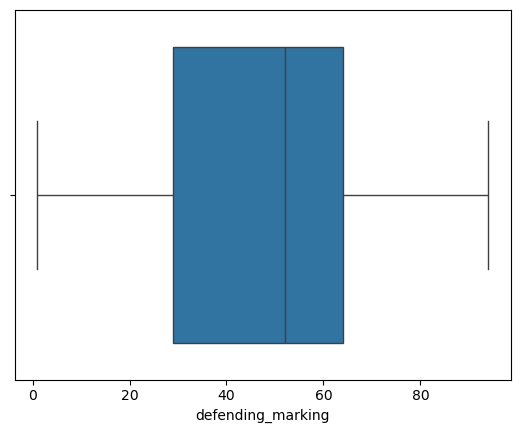

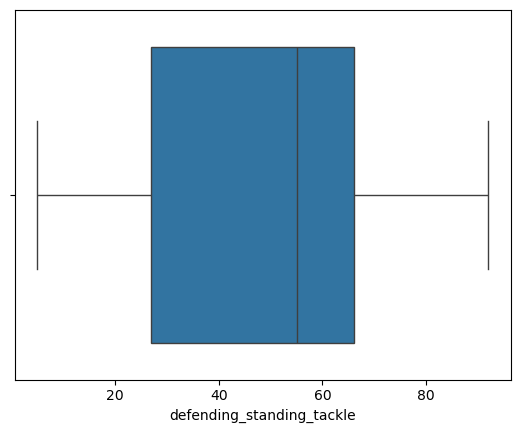

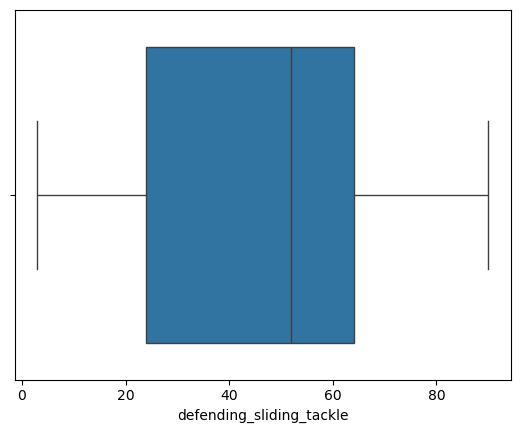

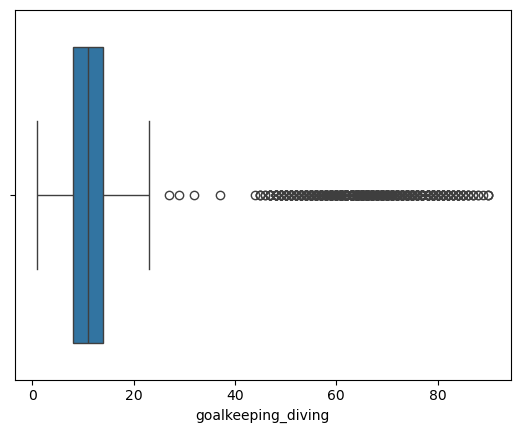

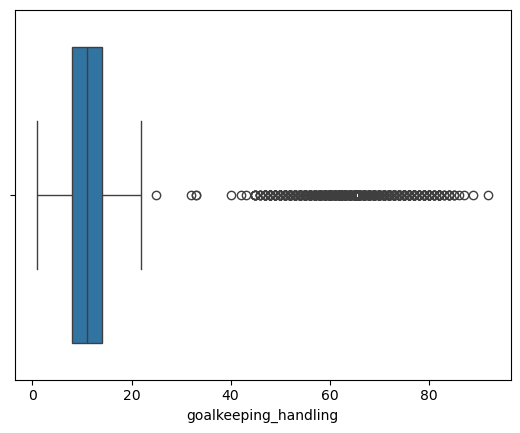

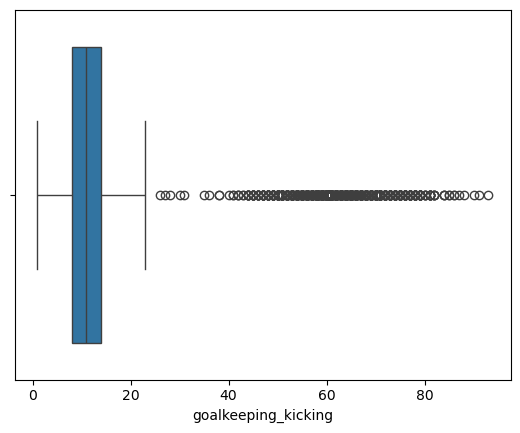

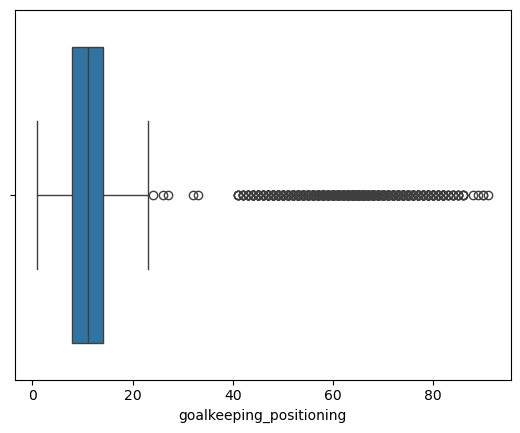

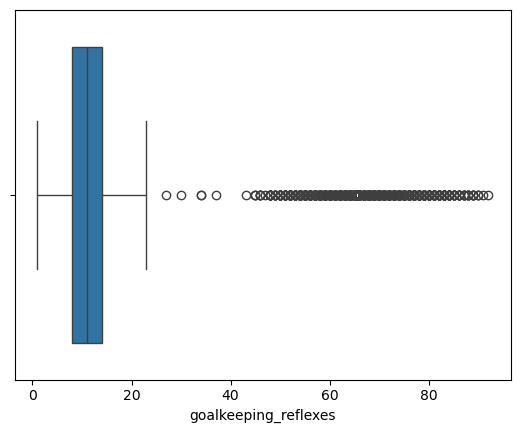

       sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
2857      214158   27        176         73       73         76    4400000   
3012      170923   35        176         78       73         73    1100000   
3027      176717   33        184         81       73         73    1900000   
3224      214477   34        180         74       73         73    1500000   
3232      215331   28        185         82       73         73    3400000   
...          ...  ...        ...        ...      ...        ...        ...   
18205     250782   18        176         70       49         64      60000   
18207     243099   21        183         70       49         63      60000   
18222     245291   23        189         77       49         58      50000   
18226     248193   21        175         70       49         56      40000   
18227     251824   23        185         74       49         56      40000   

       wage_eur  international_reputation  weak_foot  ...  \
28

In [9]:
# Assuming the dataset is loaded as 'data'

# 1. Visualize with a box plot for each numerical column
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for numerical columns
for column in numerical_columns:
    sns.boxplot(data=data, x=column)
    plt.show()

# 2. Remove Outliers Based on IQR for each numerical column
def remove_outliers(df, columns):
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define acceptable range (1.5 * IQR below Q1 and above Q3)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the data to exclude rows outside the acceptable range
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Remove outliers from the dataset
data_cleaned = remove_outliers(data, numerical_columns)

# Display the cleaned dataset
print(data_cleaned)



## Apply Scaling techniques

In [10]:
# Assuming your dataset is loaded as 'data'
# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the standardized dataset
print(data.head())


   sofifa_id       age  height_cm  weight_kg   overall  potential  value_eur  \
0  -2.207336  1.442333  -1.681598  -0.464891  3.993662   3.657156  16.653625   
1  -7.115232  1.871809   0.834394   1.095935  3.849772   3.494276  10.029126   
2  -1.032491  0.368643  -0.941600  -1.032464  3.705883   3.331397  18.444030   
3  -0.692069  0.153905   0.982394   1.663508  3.561993   3.494276  13.430896   
4  -1.304099  0.583381  -0.941600  -0.181104  3.561993   3.168517  15.668902   

    wage_eur  international_reputation  weak_foot  ...  mentality_penalties  \
0  26.019375                 10.285902   1.588459  ...             1.694500   
1  18.525626                 10.285902   1.588459  ...             2.331132   
2  13.139495                 10.285902   3.093037  ...             2.649447   
3   5.411566                  5.006771   0.083880  ...            -2.379943   
4  21.569962                  7.646337   1.588459  ...             2.522121   

   mentality_composure  defending_marking  d

In [11]:
X=data.iloc[:,1:]
X.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,1.442333,-1.681598,-0.464891,3.993662,3.657156,16.653625,26.019375,10.285902,1.588459,2.133237,...,1.694500,3.154006,-0.689317,-0.492949,-0.924093,-0.596066,-0.315057,-0.073010,-0.138191,-0.482875
1,1.871809,0.834394,1.095935,3.849772,3.494276,10.029126,18.525626,10.285902,1.588459,3.440398,...,2.331132,3.069835,-0.938188,-0.724591,-1.018357,-0.539688,-0.315057,-0.073010,-0.138191,-0.316556
2,0.368643,-0.941600,-1.032464,3.705883,3.331397,18.444030,13.139495,10.285902,3.093037,3.440398,...,2.649447,2.985664,-0.987962,-1.002561,-0.782698,-0.426933,-0.432729,-0.073010,-0.079834,-0.316556
3,0.153905,0.982394,1.663508,3.561993,3.494276,13.430896,5.411566,5.006771,0.083880,-1.788246,...,-2.379943,0.797206,-0.987962,-1.651158,-1.301147,3.970509,4.450641,3.719153,4.296909,4.007736
4,0.583381,-0.941600,-0.181104,3.561993,3.168517,15.668902,21.569962,7.646337,1.588459,2.133237,...,2.522121,2.733149,-0.639543,-0.956233,-1.112620,-0.314178,-0.256221,-0.614748,-0.488330,-0.482875


#### The elbow method is used in K-means to determine the optimal number of clusters (k). It involves plotting the sum of squared distances (inertia) versus the number of clusters and identifying the "elbow" point where the decrease in inertia slows down. This helps in selecting a k value that balances model simplicity and clustering quality.

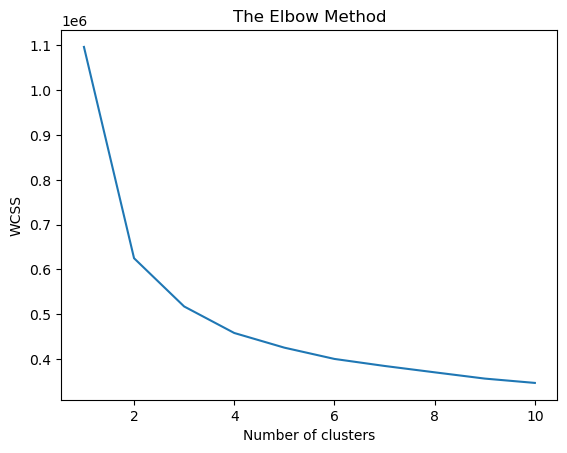

In [12]:
# Elbow Method
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Initialise the model with K as 3
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42)

#Training the model
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [14]:
label=model.labels_
label

array([0, 0, 0, ..., 2, 2, 2])

In [15]:
from collections import Counter
Counter(label)

Counter({0: 8210, 2: 8032, 1: 2036})

In [16]:
data['Labels']=label
data

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Labels
0,-2.207336,1.442333,-1.681598,-0.464891,3.993662,3.657156,16.653625,26.019375,10.285902,1.588459,...,3.154006,-0.689317,-0.492949,-0.924093,-0.596066,-0.315057,-0.073010,-0.138191,-0.482875,0
1,-7.115232,1.871809,0.834394,1.095935,3.849772,3.494276,10.029126,18.525626,10.285902,1.588459,...,3.069835,-0.938188,-0.724591,-1.018357,-0.539688,-0.315057,-0.073010,-0.138191,-0.316556,0
2,-1.032491,0.368643,-0.941600,-1.032464,3.705883,3.331397,18.444030,13.139495,10.285902,3.093037,...,2.985664,-0.987962,-1.002561,-0.782698,-0.426933,-0.432729,-0.073010,-0.079834,-0.316556,0
3,-0.692069,0.153905,0.982394,1.663508,3.561993,3.494276,13.430896,5.411566,5.006771,0.083880,...,0.797206,-0.987962,-1.651158,-1.301147,3.970509,4.450641,3.719153,4.296909,4.007736,1
4,-1.304099,0.583381,-0.941600,-0.181104,3.561993,3.168517,15.668902,21.569962,7.646337,1.588459,...,2.733149,-0.639543,-0.956233,-1.112620,-0.314178,-0.256221,-0.614748,-0.488330,-0.482875,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,0.903707,-0.705048,0.686395,0.528362,-2.625268,-2.532272,-0.437582,-0.349253,-0.272361,0.083880,...,-1.475422,-0.092027,0.109320,0.301330,-0.652443,-0.668072,-0.193396,-0.663400,-0.150237,2
18274,1.117910,-0.705048,-0.645601,-1.316251,-2.625268,-2.532272,-0.437582,-0.349253,-0.272361,-1.420698,...,-1.980451,-0.241349,0.248305,0.536989,-0.201423,-0.609236,-0.133203,-0.313260,-0.427436,2
18275,1.165729,-1.349262,0.686395,-0.039211,-2.625268,-2.532272,-0.437582,-0.396089,-0.272361,-1.420698,...,-1.643765,-0.042253,0.201976,0.018540,-0.539688,-0.491564,-0.373975,-0.605043,-0.150237,2
18276,1.122023,-1.564000,0.538395,-0.181104,-2.625268,-2.858031,-0.437582,-0.396089,-0.272361,-1.420698,...,-1.559594,-0.390672,-0.168651,0.395594,-0.145046,-0.432729,-0.193396,-0.196547,-0.205677,2


In [17]:
#model evalution
from sklearn.metrics import silhouette_score
score=silhouette_score(X,label)
score

0.2177375820884524